# STEP 1: Import Library's

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
# set the style of matplotlib to seaborn
sns.set_theme()

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error , mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, NuSVR

# STEP 2: Load the Data

In [2]:
# Load out trainig data set 

data = pd.read_csv("cs9856-spotify-regression-problem-2022/CS98XRegressionTrain.csv")
data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [3]:
data.shape

(453, 15)

In [4]:
data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


# STEP 3: Handle Missing Values

In [6]:
# Percentage of missing data is given by 

np.round( data.isna().sum() / data.shape[0] *100 ) 

Id           0.0
title        0.0
artist       0.0
top genre    3.0
year         0.0
bpm          0.0
nrgy         0.0
dnce         0.0
dB           0.0
live         0.0
val          0.0
dur          0.0
acous        0.0
spch         0.0
pop          0.0
dtype: float64

As wee see here only 3% of the data is missing; soo we will eliminate the data points by dropppng the records that has the missing values 

In [7]:
# drop the records that are having the null values! 

data.dropna(inplace= True, axis= 0)
data.reset_index(drop= True, inplace= True)

# see the amount of data that is missing 
np.round( data.isna().sum() / data.shape[0] *100 ) 


Id           0.0
title        0.0
artist       0.0
top genre    0.0
year         0.0
bpm          0.0
nrgy         0.0
dnce         0.0
dB           0.0
live         0.0
val          0.0
dur          0.0
acous        0.0
spch         0.0
pop          0.0
dtype: float64

# STEP 4: Exploratory Data Analytics

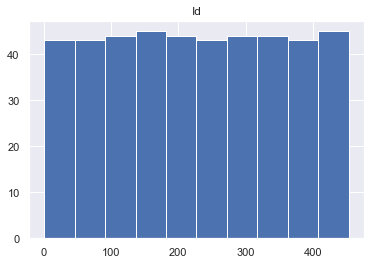

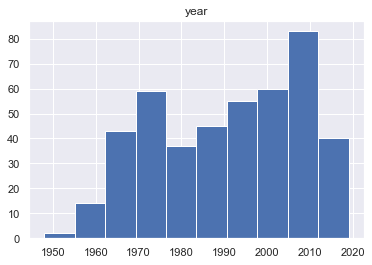

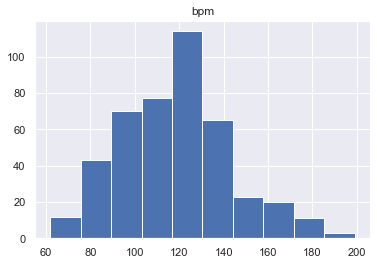

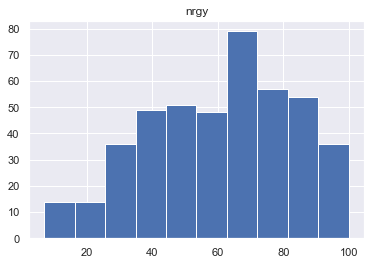

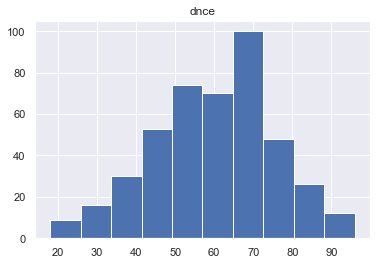

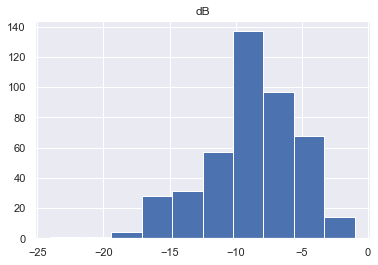

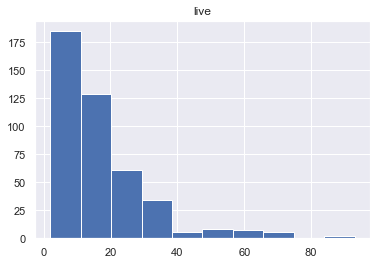

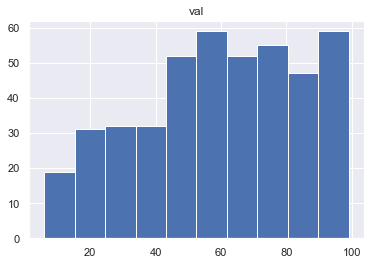

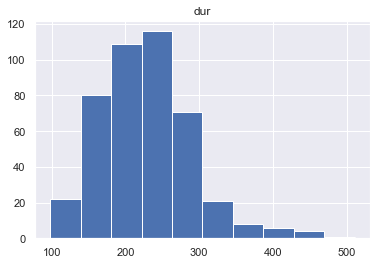

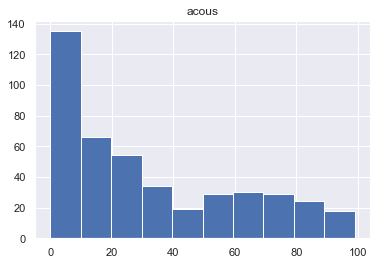

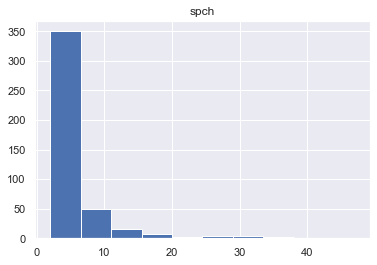

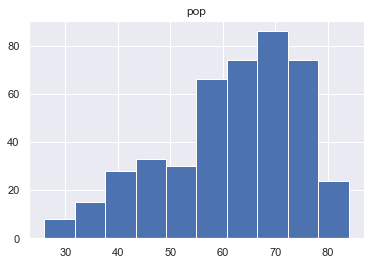

In [8]:
# Plot the various numerical values/ Continious Values and there distrobution 

for i in data.select_dtypes(np.number):
    plt.hist(data[i].values)
    plt.title(i)
    plt.show()
    

In [9]:
# Lets see the number of unique values in the categorical features 

for i in data.select_dtypes(np.object0):
    print(f"The amount of the unique values in {i} are {data[i].nunique()/data.shape[0] *100 } % ")
    

The amount of the unique values in title are 99.54337899543378 % 
The amount of the unique values in artist are 75.57077625570776 % 
The amount of the unique values in top genre are 19.63470319634703 % 


As you can see here "ID" Column is just the numbers from 1 to the sape of the data frame, we will drop the column! 
Also we the "songs colum has all the unique vales! although the song is important but all the values are unique thus its better we will eliminate that feaature !

In [10]:
data.drop(['Id','title','year'], axis= 1, inplace= True)

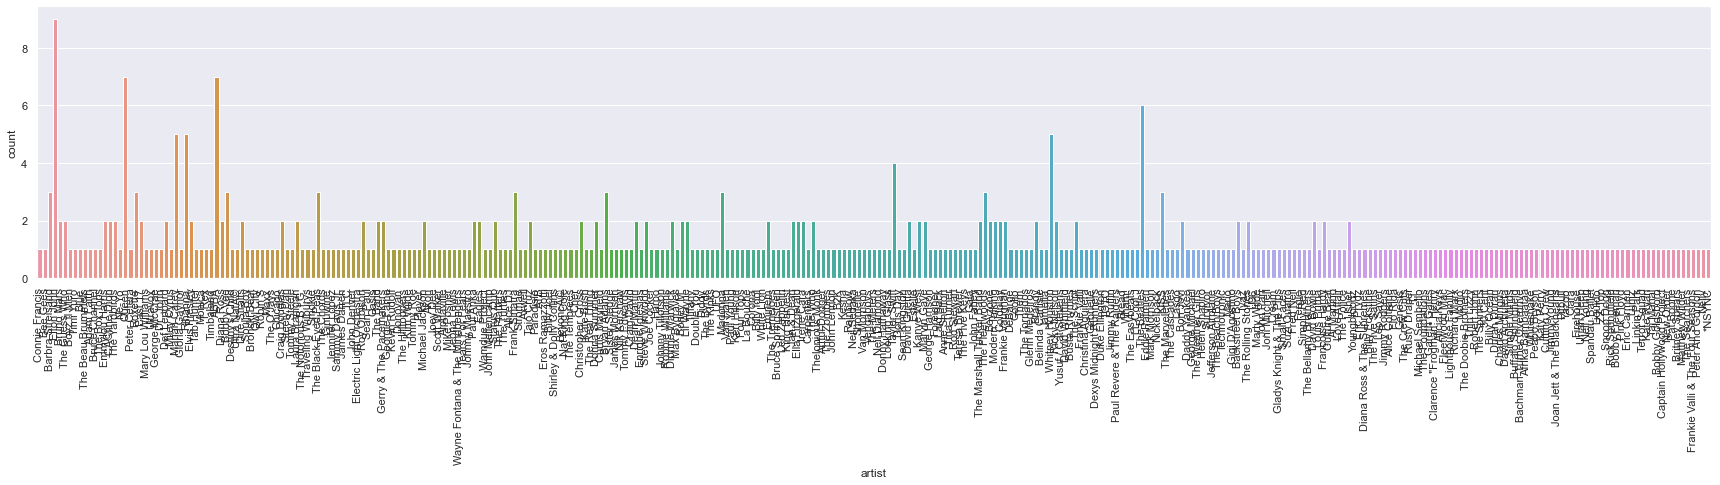

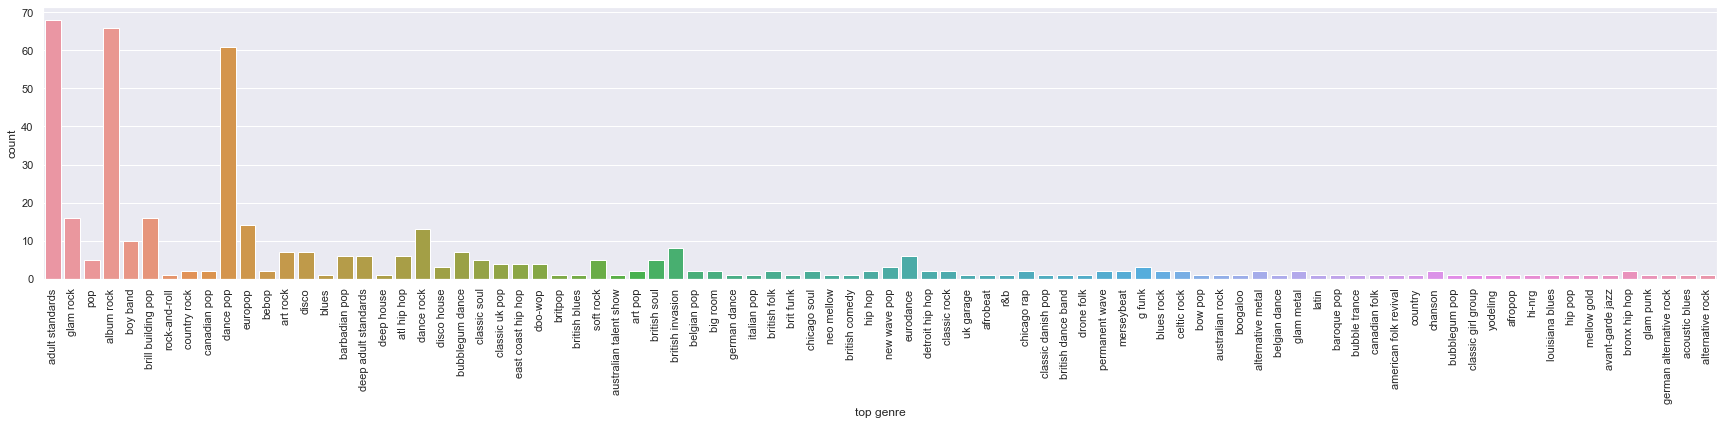

In [11]:
"""
Lets see the data distribution between the various categorical values 
"""

for i in data.select_dtypes(np.object0):
    plt.figure(figsize=(30,5))
    sns.countplot( x = i, data = data)
    plt.xticks(rotation = 90)
    plt.show()

Outlier Detection

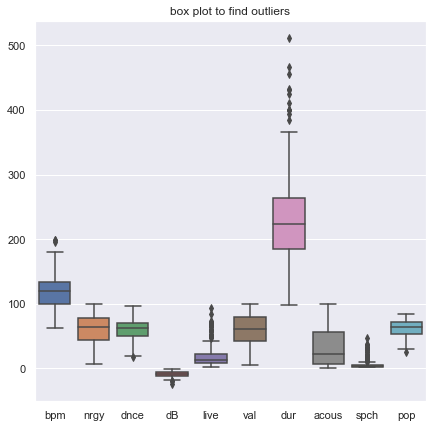

In [12]:
plt.figure(figsize=(7,7))
plt.title("box plot to find outliers")
sns.boxplot(data = data)
plt.show()

/var/folders/4v/frscxfgd3bd7frrl9013_8wh0000gn/T/ipykernel_14673/1315673036.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < lower_bound) | (data > upper_bound ) ).any(axis = 1)];


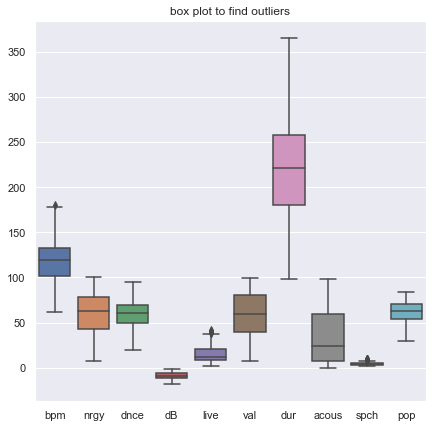

In [13]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)


data = data[~((data < lower_bound) | (data > upper_bound ) ).any(axis = 1)];


plt.figure(figsize=(7,7))
plt.title("box plot to find outliers")
sns.boxplot(data = data)
plt.show()

As we can see that data has been equally distributed among all the datapoints! Except for few classes 

In [14]:
# Lets try to label encode the values 

from sklearn.preprocessing import LabelEncoder


# Dictionary that has the object os the label encoder !
label_dict = {}

for i in data.select_dtypes(np.object0): 

    le = LabelEncoder()
    label_dict[i] = le.fit(data[i])
    data[i] = label_dict[i].transform(data[i])


data.head()    


,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,46,1,107,31,45,-8,13,28,150,75,3,44
1,15,1,105,36,63,-9,13,67,245,11,3,77
2,14,1,170,28,47,-16,13,33,232,25,3,67
3,78,58,121,47,56,-8,15,40,193,45,3,63
4,35,70,110,56,71,-7,12,23,223,15,6,74


<AxesSubplot:>

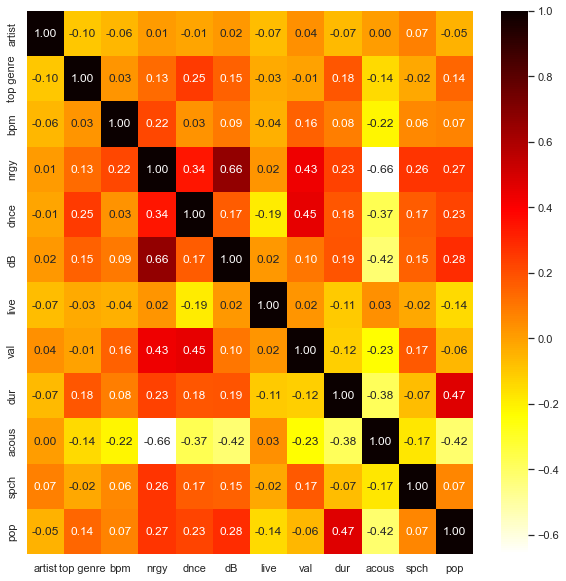

In [15]:
# corelation matrix 

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot= True, fmt= '.2f', cmap= 'hot_r'  )

In [16]:
# analiseing the feature importance using randome forest

fe_imp = RandomForestRegressor(max_depth= 6 )
fe_imp.fit(data.iloc[:, :-1].values , data.iloc[:, -1].values)

for i, j in enumerate(fe_imp.feature_importances_):
    print(f"{i} :   {data.columns[i]}  has the { np.around(j , decimals= 2 ) } importance")

0 :   artist  has the 0.04 importance
1 :   top genre  has the 0.06 importance
2 :   bpm  has the 0.04 importance
3 :   nrgy  has the 0.09 importance
4 :   dnce  has the 0.06 importance
5 :   dB  has the 0.05 importance
6 :   live  has the 0.04 importance
7 :   val  has the 0.04 importance
8 :   dur  has the 0.45 importance
9 :   acous  has the 0.09 importance
10 :   spch  has the 0.02 importance


####  Dimentianality Reduction 

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

most_valued_data_points = pca.fit_transform(data.iloc[:, :-1].values)


DATA = pd.DataFrame(data = most_valued_data_points , columns = ['PC-1', 'PC-2'])

DATA['Target'] = data.iloc[:, -1].values


DATA.head()

,PC-1,PC-2,Target
0,82.912869,-93.572347,44
1,122.217636,11.624712,77
2,123.651866,-2.599529,67
3,57.219091,-33.515433,63
4,103.424606,2.201034,74


In [18]:
import plotly.express as px 


fig = px.scatter_3d(DATA , x = 'PC-1', y = 'PC-2', z = 'Target')

fig.show()

In [19]:
DATA =data

### Split the data and normalisation 

In [20]:
X_train, X_test, y_train, y_test = train_test_split( DATA.iloc[:, :-1].values , DATA.iloc[:, -1].values , test_size=0.20)

In [21]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)

In [22]:
def regression_evaluation_report(test , predict):
    """
    input: 
        test: actual values 
        predict: values predicted by the model 
    
    output: Generates a report based on various metrics  
    """

    print(f"Root Mean Square Error = { np.sqrt( mean_squared_error(test, predict) )} ")
    
    print(f"The mean absolute error = {mean_absolute_error(test, predict) }")

    print(f"The mean absolute percentage error = {mean_absolute_percentage_error(test, predict) }  ")






In [23]:
def plot_learning_curve(model, model_type):
    """
    input  : takess the object of the model
    output :  
    """
    train_error , test_error = [] , []

    for i in range(1 , len(X_train)):
        model.fit(X_train[:i] , y_train[:i])
        y_train_pred = model.predict(X_train[:i])
        y_test_pred  = model.predict(X_test)
        train_error.append(mean_squared_error(y_train[:i], y_train_pred))
        test_error.append(mean_squared_error(y_test_pred , y_test))
    
    plt.figure(figsize=(10,10))
    plt.plot(np.sqrt(train_error) , "r-+" , label = "Train" )
    plt.plot(np.sqrt(test_error) , "b-" , label = "Test" )
    plt.xlabel(" epochs ")
    plt.ylabel("RMSE")
    plt.title(model_type)
    plt.legend()
    plt.show()
    
    

### Simple Linear Regression 

Root Mean Square Error = 739.3955163307223 
The mean absolute error = 659.5544320227665
The mean absolute percentage error = 10.68393487943654  


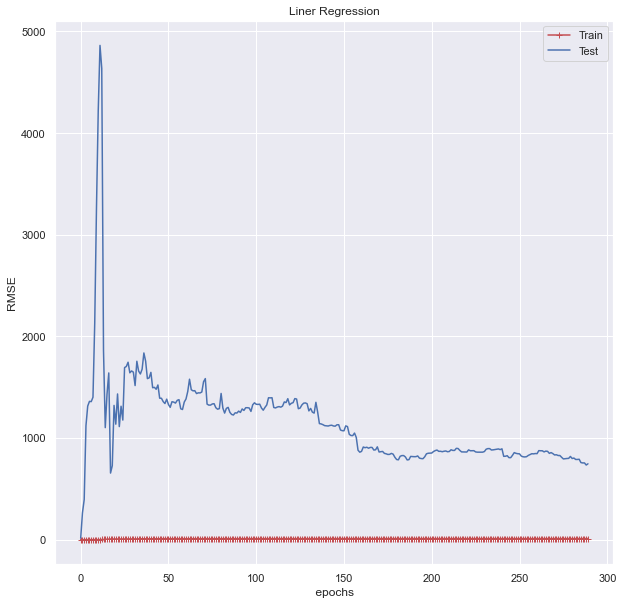

In [24]:
model_1 = LinearRegression() 
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

regression_evaluation_report(y_test, y_pred_1)
plot_learning_curve(model_1, "Liner Regression")

### Regularized Linear Regression (Elastic Net)

Root Mean Square Error = 765.8243688715336 
The mean absolute error = 699.9479118535211
The mean absolute percentage error = 11.387538480103396  


/Users/junaidiqbalsyed/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00



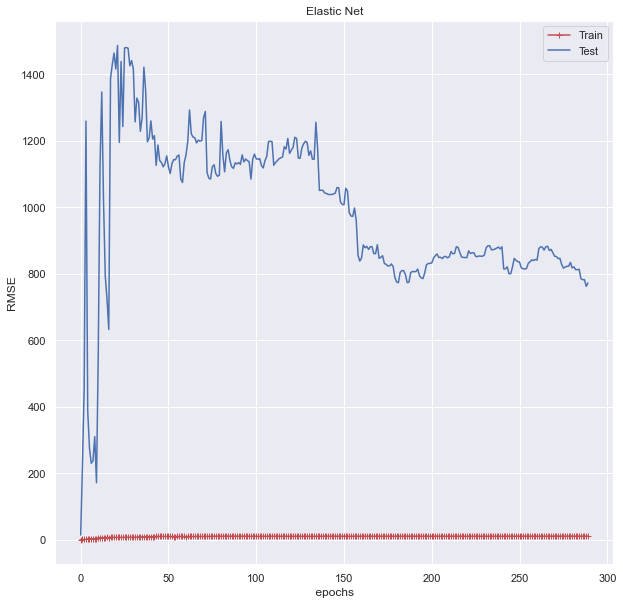

In [25]:
model_1_1 = ElasticNet(alpha= 0.2 , l1_ratio= 0.6)

model_1_1.fit(X_train, y_train)
y_pred_1_1 = model_1_1.predict(X_test);

regression_evaluation_report(y_test, y_pred_1_1)
plot_learning_curve(model_1_1, "Elastic Net")

### Decission Tree 

Root Mean Square Error = 19.683453867763745 
The mean absolute error = 17.575342465753426
The mean absolute percentage error = 0.27465212906625525  


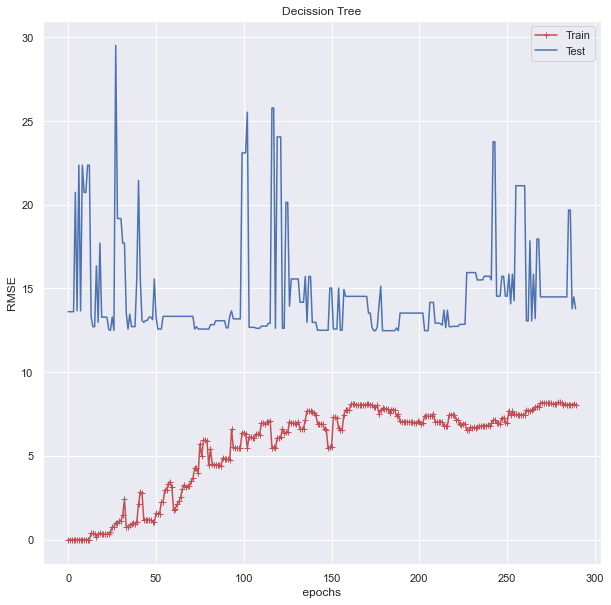

In [26]:
model_2 = DecisionTreeRegressor(max_depth= 5 )
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

regression_evaluation_report(y_test, y_pred_2)
plot_learning_curve(model_2, "Decission Tree")

### Random forest 

Root Mean Square Error = 12.41768883047127 
The mean absolute error = 9.975205479452052
The mean absolute percentage error = 0.18847860964682064  


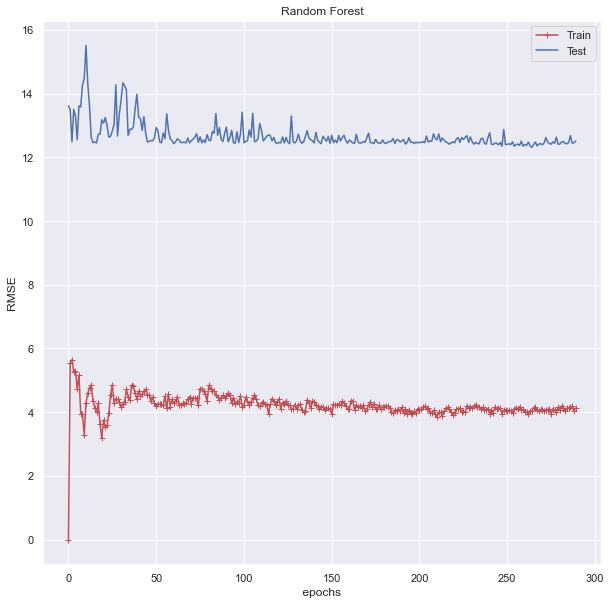

In [27]:
model_3 = RandomForestRegressor()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
regression_evaluation_report(y_test, y_pred_3)
plot_learning_curve(model_3, "Random Forest")

### SVM for Regression

Root Mean Square Error = 12.4907811437059 
The mean absolute error = 9.801353394149313
The mean absolute percentage error = 0.18950582144031428  


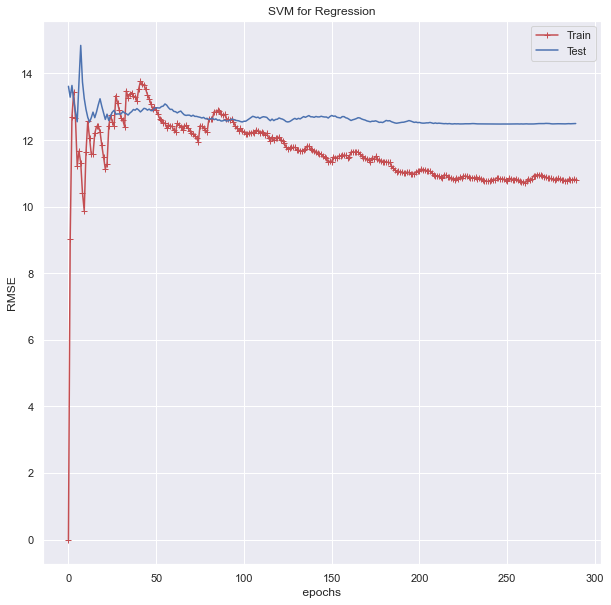

In [28]:
model_4 = SVR()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

regression_evaluation_report(y_test, y_pred_4)
plot_learning_curve(model_4, "SVM for Regression")